# Complete Timeseries Analysis with python

In [3]:
import pandas as pd
dict={'a' :3, 'b' : 'cat', 'c' : 2.5}
pd.Series(dict)

a      3
b    cat
c    2.5
dtype: object

In [4]:
oneD = pd.Series([100, 'cat', 310, 'gog', 500], ['Amy', 'Bobby', 'Cat', 'Don', 'Emma'])
oneD                  

Amy      100
Bobby    cat
Cat      310
Don      gog
Emma     500
dtype: object

In [5]:
oneD = pd.Series([100, 'cat', 310, 'gog', 500], index=['Amy', 'Bobby', 'Cat', 'Don', 'Emma'])
oneD                  

Amy      100
Bobby    cat
Cat      310
Don      gog
Emma     500
dtype: object

In [6]:
oneD.loc[['Cat','Emma']]

Cat     310
Emma    500
dtype: object

In [7]:
file=r"C:\Users\HDHARANI\Downloads\Data1\Data1\section 2\Resp2.csv"
df1=pd.read_csv(file)
#df1=pd.read_csv(file, sep= ";")
df1.head()

,experience,respiration
0,0,3.94
1,0,4.26
2,0,4.16
3,0,3.76
4,0,4.07


# Preprocessing time series data


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [9]:
df = pd.read_csv(r'C:\Users\HDHARANI\Downloads\Data1\Data1\section 3\italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')


In [10]:
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [11]:
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [12]:

df.index = pd.to_datetime(df.index)
df.head() 

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [13]:
df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


In [14]:
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as pyplot


In [15]:
df.head(n=7)

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
2016-08-24 03:43:58.700,42.7298,13.2137,10.7,3.4
2016-08-24 03:44:38.660,42.6760,13.2858,10.8,2.7


# #plot daily variation

Text(0, 0.5, 'magnitude')

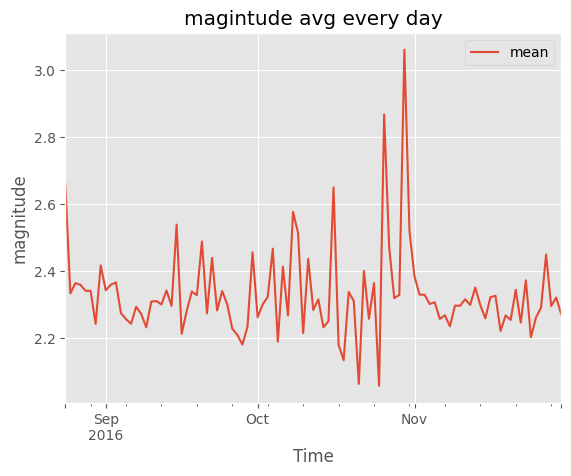

In [17]:

df["Magnitude"].resample("D").apply([np.mean]).plot()
plt.title("magintude avg every day")
plt.ylabel("magnitude")

# every 2 day period

Text(0, 0.5, 'magnitude')

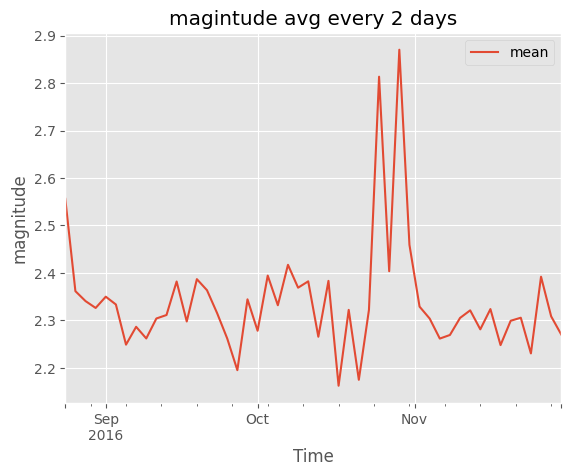

In [18]:
df["Magnitude"].resample("2D").apply([np.mean]).plot()
plt.title("magintude avg every 2 days")
plt.ylabel("magnitude")

# Use Rolling AVG / Moving AVG - which tells us trends by considering short period.


In [19]:
#pandas series with magnitude greater than 3.0
magn3 = df.loc[df["Magnitude"] >= 3.0, "Magnitude"]

Text(0, 0.5, 'magnitude')

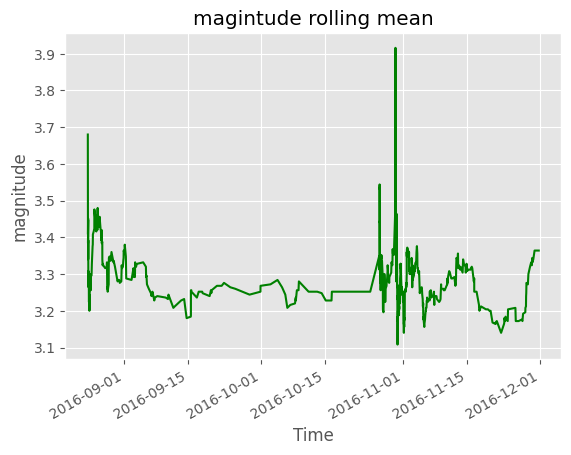

In [20]:
pd.Series.rolling(magn3, window=25).mean().plot(style="-g")
plt.title("magintude rolling mean")
plt.ylabel("magnitude")

# with finanacial dataset

In [21]:
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pyplot


In [22]:
stock = pd.read_csv(r"C:\Users\HDHARANI\Downloads\all_stocks_2006-01-01_to_2018-01-01.csv", index_col = 'Date', parse_dates=['Date'])

In [23]:
stock.head(n=7)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
2006-01-10,79.00,79.01,78.08,78.53,1919900,MMM
2006-01-11,78.44,78.66,77.84,78.37,1911900,MMM


In [24]:
stock.Name.unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [25]:
app_stk = stock.query('Name == "AAPL"')
g_stk = stock.query('Name == "GOOGL"')
ibm_stk = stock.query('Name == "IBM"')

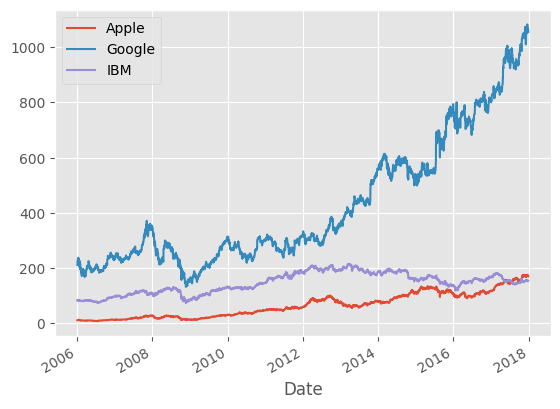

In [26]:
app_stk.Open.plot()
g_stk.Open.plot()
ibm_stk.Open.plot()
plt.legend(['Apple', 'Google', 'IBM'])
plt.show()

# Aggregating and visualising data summary

In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [28]:
data = pd.read_csv(r"C:\Users\HDHARANI\Downloads\Data1\Data1\section 3\avocado.csv", parse_dates = ['Date'])

In [29]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [30]:
summr = data.groupby('Date')['Total Volume'].mean().reset_index()
summr.head()

,Date,Total Volume
0,2015-01-04,7.840216e+05
1,2015-01-11,7.273686e+05
2,2015-01-18,7.258221e+05
3,2015-01-25,7.080211e+05
4,2015-02-01,1.106048e+06


<Axes: xlabel='Date'>

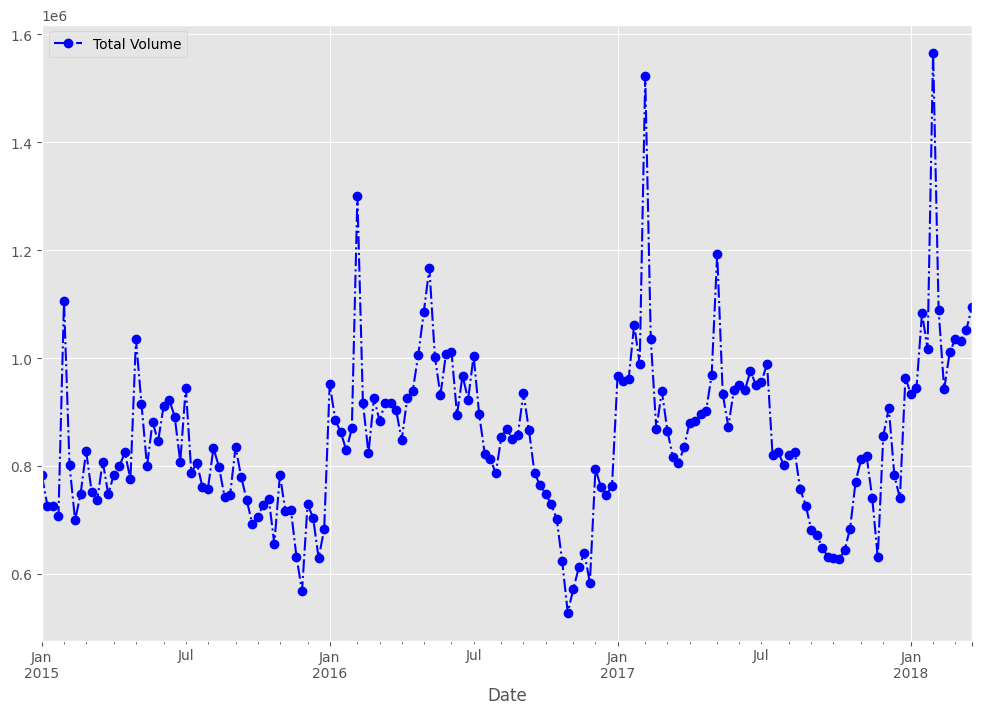

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
summr.set_index('Date').plot(ax=ax, marker="o", linestyle="-.", color="Blue")

Text(0.5, 0, 'Month')

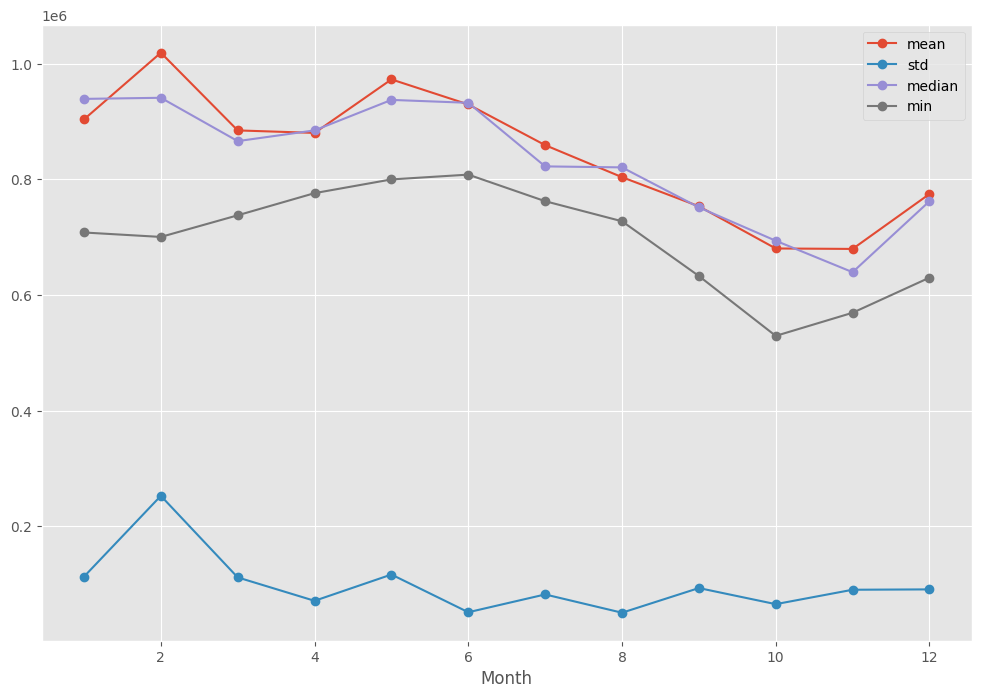

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
(summr.set_index('Date')
     .assign(month=lambda df: df.index.month)
     .groupby('month')['Total Volume']
     .agg(["mean", "std", "median", "min"])
     .plot(ax=ax, marker="o"))
ax.set_xlabel('Month')

# Data Munging /  Wrangling - Preparing data in another format or however we want for further requirements.

In [45]:
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pyplot


In [46]:
    df = pd.read_csv(r'C:\Users\HDHARANI\Downloads\all_stocks_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])

In [47]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [48]:
rng = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')
rng[~rng.isin(df.Date.unique())]

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

In [49]:
sample_dates = pd.date_range(start='2006-01-01', end='2018-01-01', freq='B')

In [50]:
year_end_dates = sample_dates[sample_dates.is_year_end]

In [51]:
worst_stocks = df[df.Date == df.Date.max()].sort_values('Open').head(5)

In [52]:
worst_stocks

,Date,Open,High,Low,Close,Volume,Name
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE
21137,2017-12-29,38.41,38.62,38.30,38.30,12583621,CSCO
24157,2017-12-29,45.70,46.18,45.69,45.88,8371536,KO
45296,2017-12-29,46.21,46.49,46.09,46.16,17394491,INTC


In [53]:
ws = worst_stocks.Name.values

In [54]:
tdf = df.copy()
tdf = df.set_index('Date')

Name
CSCO    Axes(0.125,0.2;0.775x0.68)
GE      Axes(0.125,0.2;0.775x0.68)
INTC    Axes(0.125,0.2;0.775x0.68)
KO      Axes(0.125,0.2;0.775x0.68)
PFE     Axes(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

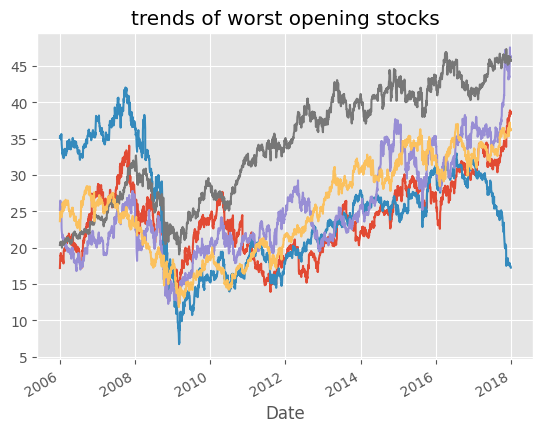

In [55]:
tdf[tdf.Name.isin(ws)].groupby('Name').Open.plot(title='trends of worst opening stocks')

In [56]:
best_stocks = df[df.Date == df.Date.max()].sort_values('Open', ascending=False).head(5)

In [57]:
bs = best_stocks.Name.values

Name
AMZN     Axes(0.125,0.2;0.775x0.68)
BA       Axes(0.125,0.2;0.775x0.68)
GOOGL    Axes(0.125,0.2;0.775x0.68)
GS       Axes(0.125,0.2;0.775x0.68)
MMM      Axes(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

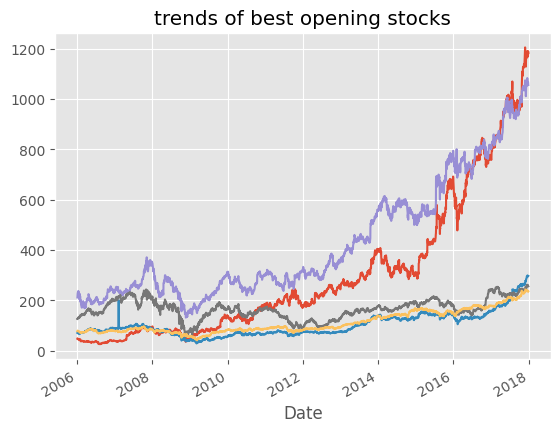

In [58]:
tdf[tdf.Name.isin(bs)].groupby('Name').Open.plot(title='trends of best opening stocks')

# Histogram for continuous numerical values

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
df = pd.read_csv(r'C:\Users\HDHARANI\Downloads\Data1\Data1\section 3\italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')


Text(0.5, 0, 'depth/km')

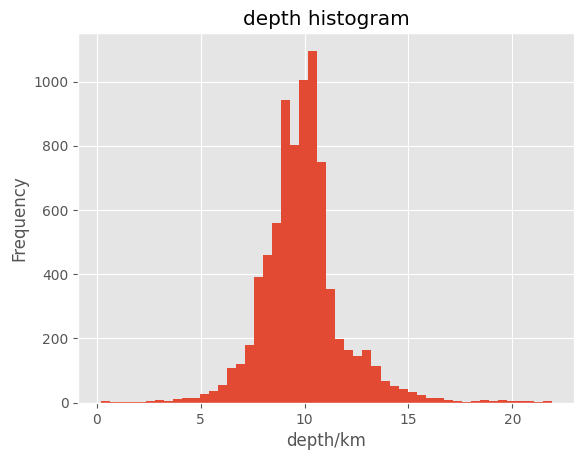

In [60]:
plt.figure()
depth = df[(df["Depth/Km"] < 22) & (df["Depth/Km"] >= 0)]["Depth/Km"]
depth.plot(kind="hist", stacked=True, bins=50)
plt.title("depth histogram")
plt.xlabel("depth/km")


#Temporal variations in 2 entities 

In [61]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use("ggplot")
df = pd.read_csv(r'C:\Users\HDHARANI\Downloads\Data1\Data1\section 3\italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')


In [62]:
df.head(n=8)

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
2016-08-24 03:43:58.700,42.7298,13.2137,10.7,3.4
2016-08-24 03:44:38.660,42.6760,13.2858,10.8,2.7
2016-08-24 03:44:56.400,42.6282,13.2648,10.6,3.2


In [63]:
df.index = pd.to_datetime(df.index)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [64]:
depth_magn = df.where((df["Magnitude"] >= 3.0)).dropna()[["Magnitude", "Depth/Km"]]
dm = depth_magn.groupby(depth_magn.index.hour).mean()

Text(0.5, 1.0, 'Magnitude and Depth during the day')

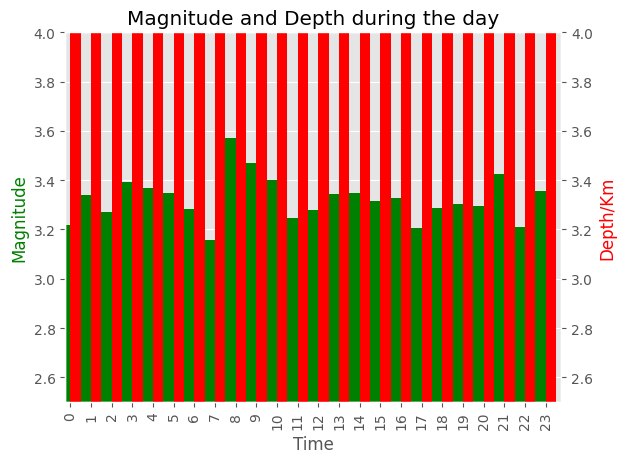

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([2.5, 4.0])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Hour of the day")
ax.yaxis.label.set_color("green")

ax2 = ax.twinx()
ax2.set_ylim([2.5, 4.0])
ax2.set_ylabel("Depth/Km")
ax2.set_xlabel("Hour of the day")
ax2.yaxis.label.set_color("red")

width = 0.5
dm["Magnitude"].plot(kind="bar", color='green', ax=ax, width=width, position=1)
dm["Depth/Km"].plot(kind="bar", color='red', ax=ax2, width=width, position=0)

plt.grid(False)
plt.title("Magnitude and Depth during the day")

# moving average forecasting (you do this practical) 23rd lecture

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime




In [32]:
#i'm finding issue with these 2 lines, so i ll just read the csv file
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(r"C:\Users\HDHARANI\Downloads\AirPassengers.csv", parse_dates=['Month'], index_col='Month', date_format='%Y-%m')

In [30]:
#data = pd.read_csv(r"C:\Users\HDHARANI\Downloads\AirPassengers.csv", parse_dates=['Month'], index_col='Month')

In [33]:
data.index



DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

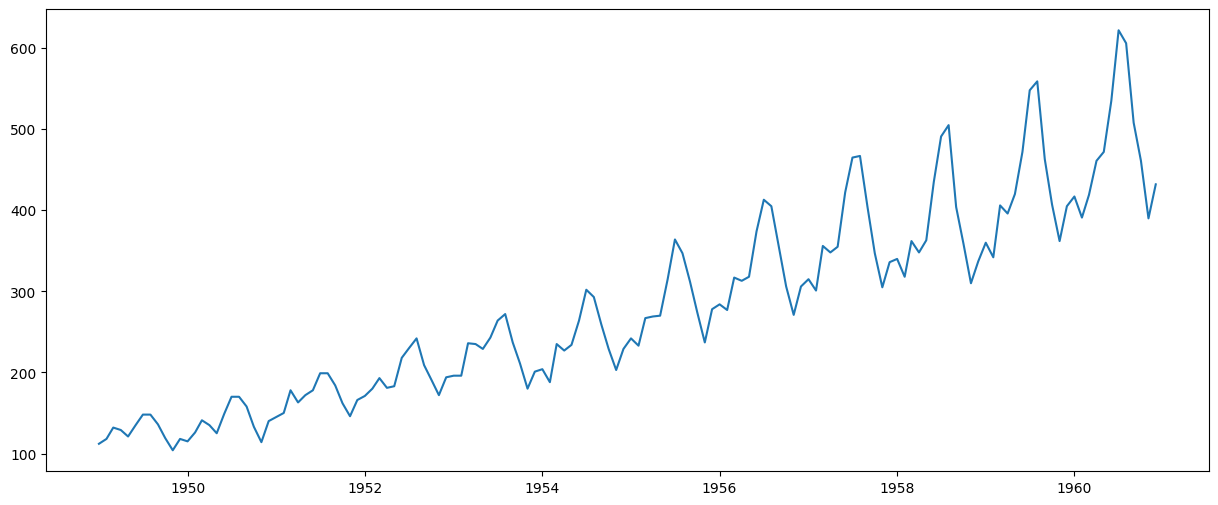

In [34]:
plt.plot(data)



In [35]:
##find the optimal forecasting period
#i didn't understand this part
optimal_n = None
best_mse = None
db = data[['#Passengers']].values.astype('float32')
##cast response variable Passengers as float32
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))
for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)
print("MSE = %s" % mean_results_for_all_possible_n_values)
print("Best MSE = %s" % best_mse)
print("Optimal n = %s" % optimal_n)


MSE = [ 2339.63356126  2764.88660714  3012.10128709  3151.45469085
  3227.18632274  3256.56100643  3186.6614532   3011.60186946
  2743.00652782  2472.34091928  2354.71361401  2403.15665424
  2555.64628844  2755.90582275  2957.73325883  3148.95678109
  3318.74202065  3471.20655414  3579.85735927  3632.1383133
  3621.28446048  3590.00382793  3614.46072399  3714.23057056
  3856.30383806  4039.07639445  4228.22951927  4417.98332931
  4590.62775569  4759.11651611  4915.97544876  5048.63704665
  5147.82094512  5226.01903743  5334.33177783  5486.37155691
  5665.83581156  5879.92290769  6108.05805477  6311.94563847
  6507.04778972  6685.18398409  6897.90877682  7105.06745207
  7299.11089319  7470.66004841  7664.68188379  7894.86749032
  8104.34268864  8337.10501668  8595.05628641  8844.55092457
  9063.90415815  9272.33339998  9544.40100932  9837.04023888
 10135.60331142 10420.20548681 10725.07181564 11069.94461765
 11393.32528446 11748.71711731 12111.18046458 12433.46474122
 12664.11747454 129

MA = 427.66666


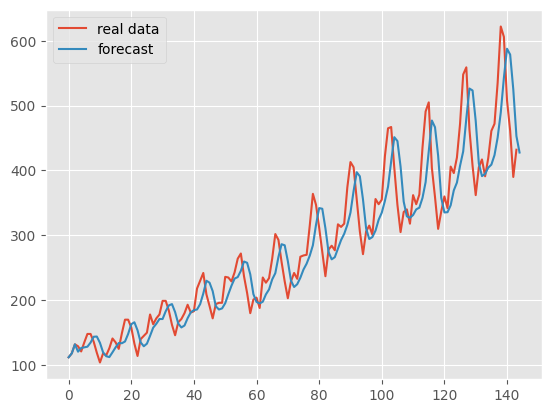

In [74]:
#forecast t+1 observation
print("MA = %s" % np.mean(db[:, 0][len(db) - optimal_n:len(db)]))

forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        forecast[i+optimal_n] = np.mean(db[:, 0][i:i+optimal_n])
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()


# Components of timeseries data -  from 24th lecture
1. trend
2. cyclic 
3. seasoning
4. random

look what plot rolling avg also.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas import Series
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [76]:


data = pd.read_csv(r"C:\Users\HDHARANI\Downloads\AirPassengers.csv", header=0) .set_index('Month')



In [77]:
data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


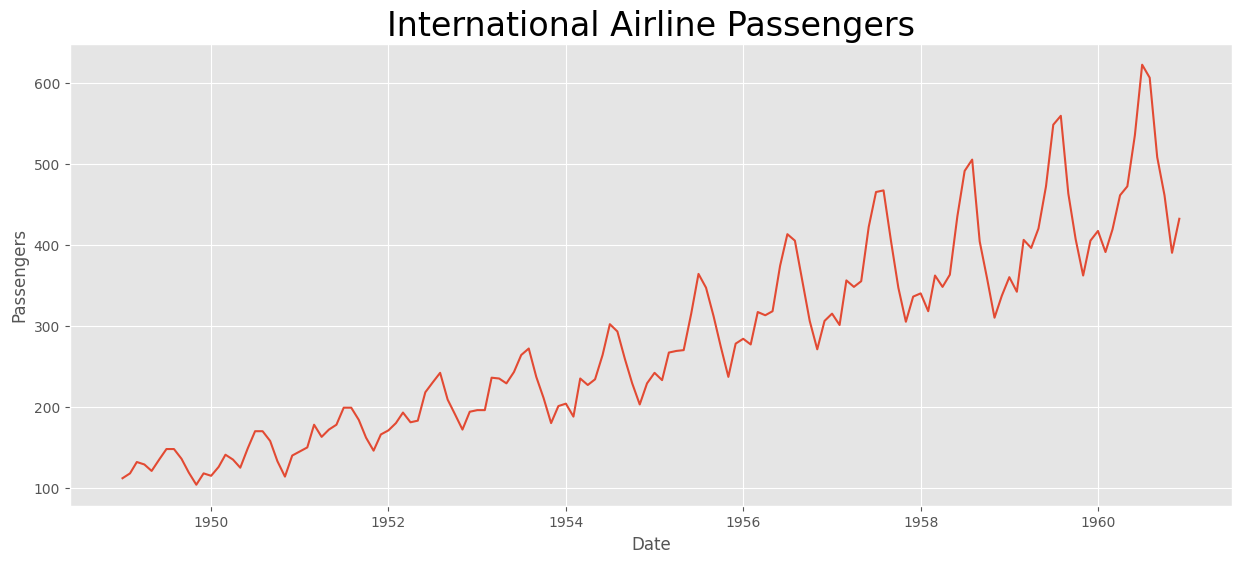

In [78]:
#data = pd.read_csv(r"C:\Users\HDHARANI\Downloads\AirPassengers.csv", header=0) .set_index('Month')
data.index = pd.to_datetime(data.index)

plt.plot(data)
plt.title('International Airline Passengers', fontsize=24)
plt.ylabel('Passengers')
plt.xlabel('Date')
plt.show()


In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose



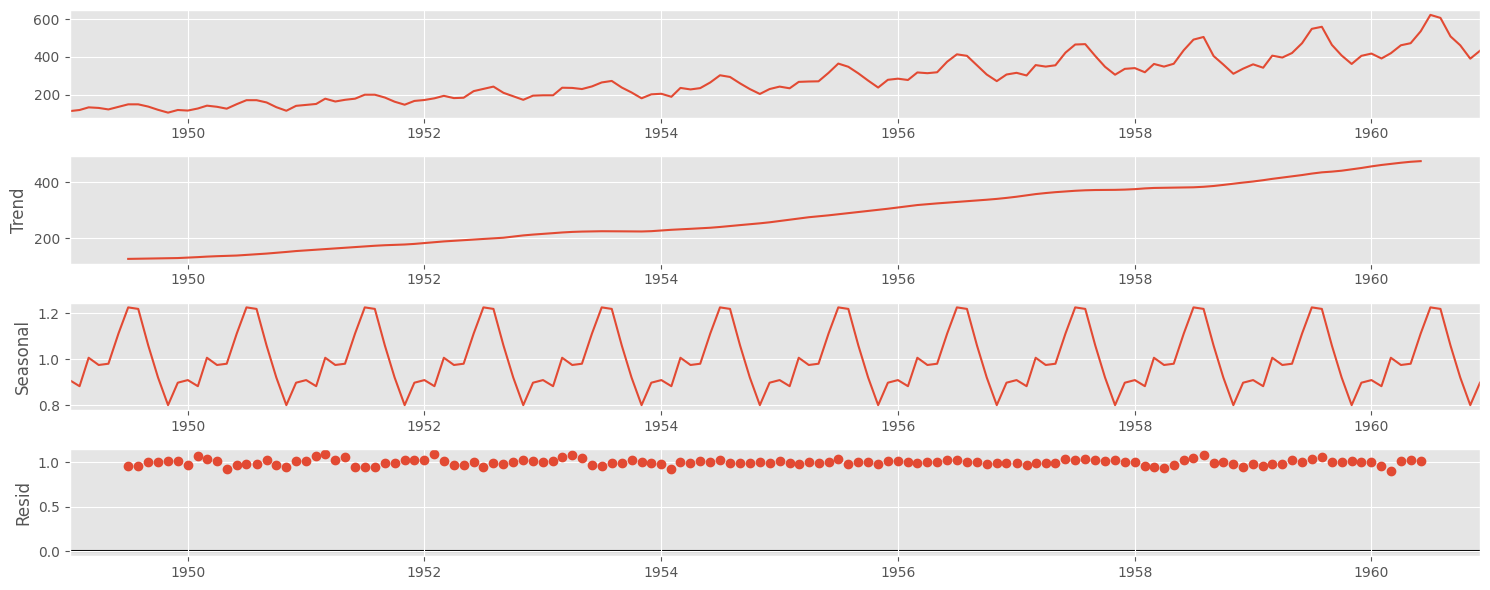

In [80]:
result = seasonal_decompose(data, model='multiplicative')

result.plot()
plt.show()



# Multiplicative and addictive seasonality-- 27th lecture
1. Addictive is constand and 
2. mulplicative will be proportionally changing 
--- in terms of level, seasoning, trend and noise

# Testing if data is stationary or not.
# Stationary - means, data is having constant mean, constant variance and an auto co-variance that doesn't depend on time.

how it is done?
via ADF test.
-- means, if p>0.05 means it has a unit root telling us it is non-stationary.
-- ADF -> Augmented Dickey Fuller

In [3]:
# from statsmodels.tsa.stattools import adfuller
import pandas as pd
from pandas import Series
from datetime import datetime


# Next code is continuation of 23rd lecture, so check it out to remove this error.

In [4]:
series = pd.read_csv(r"C:\Users\HDHARANI\Downloads\AirPassengers.csv", header=0)
X = series.values
X = series[['Month']].values.astype('float32')
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ValueError: could not convert string to float: '1949-01'

# to make timeseries stationary
*reduce trend
*take log

this below code also related to 23rd section, check it out


In [88]:
#this code didn't work so i'm just reading file
#dateparse = lambda dates: pd.datetime.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv(r"C:\Users\HDHARANI\Downloads\AirPassengers.csv", parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data = pd.read_csv(r"C:\Users\HDHARANI\Downloads\AirPassengers.csv", parse_dates=['Month'], index_col='Month')

In [89]:
data.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [90]:
d_log=np.log(data) ## take log



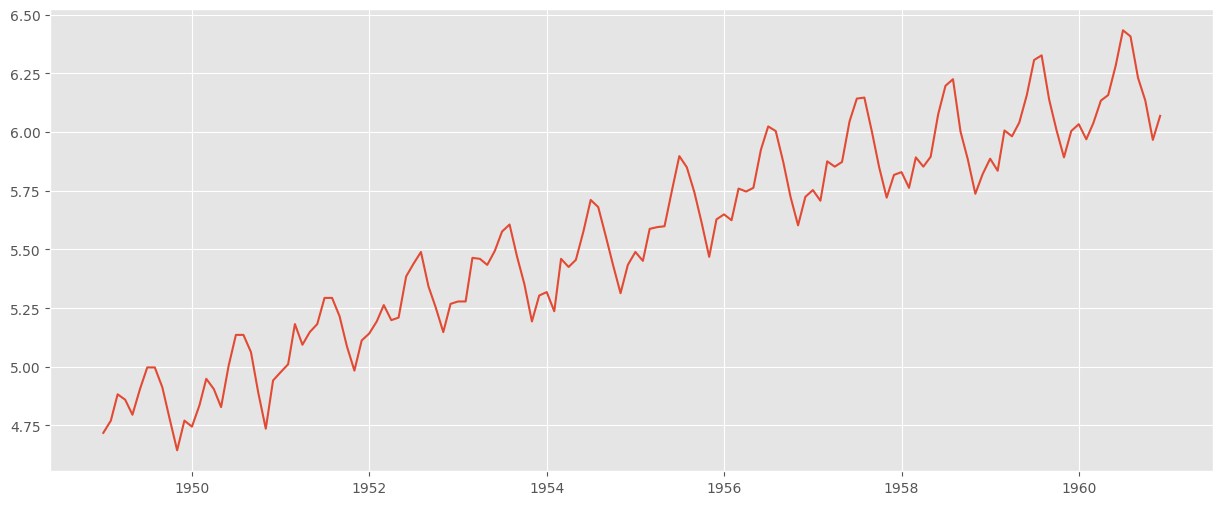

In [91]:
plt.plot(d_log)

# Another way of making data stationary - simple differencing

In [92]:
y = data['#Passengers']



In [93]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)




In [94]:
# apply the function to the time series
adf_test(y)



Results of Augmented Dickey-Fuller test:
test statistic            0.815369
p-value                   0.991880
# of lags                13.000000
# of observations       130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [95]:
##first order difference -----> series of changes to the one period to the next i.e., yt-yt-1
## Yt-Yt-1

# difference time series
y_diff = np.diff(y)



In [96]:
adf_test(y_diff) #after first order differencing p is nearer to the 0.5 but it is actually 0.54. so it is still non-stationary.

Results of Augmented Dickey-Fuller test:
test statistic           -2.829267
p-value                   0.054213
# of lags                12.000000
# of observations       130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


# Log based differencing

In [98]:
# i didn't do practical as i was tired.

#but steps are:-
  #  1. take log
  # 2. Get mean of period
  #  3. get moving avg
  #  4. get diff between logged moving avg and logged actual number of passanger
  #  5. data clean
  #  6. adfuller model
  #  7. get results which is p<0.05.

# Rolling Mean For Detecting Temporal Variation

In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



In [3]:
stock = pd.read_csv(r"C:\Users\HDHARANI\Downloads\all_stocks_2006-01-01_to_2018-01-01.csv", 
                        index_col='Date', parse_dates=['Date'])

stock.head(n=8)



,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
2006-01-10,79.00,79.01,78.08,78.53,1919900,MMM
2006-01-11,78.44,78.66,77.84,78.37,1911900,MMM
2006-01-12,78.20,78.23,77.20,77.70,2121100,MMM


In [4]:
g_stk = stock.query('Name == "GOOGL"')

g_stk.head()



,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [5]:
g_stk['Ticks'] = range(0,len(g_stk.index.values))

C:\Users\HDHARANI\AppData\Local\Temp\ipykernel_2784\255523974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_stk['Ticks'] = range(0,len(g_stk.index.values))


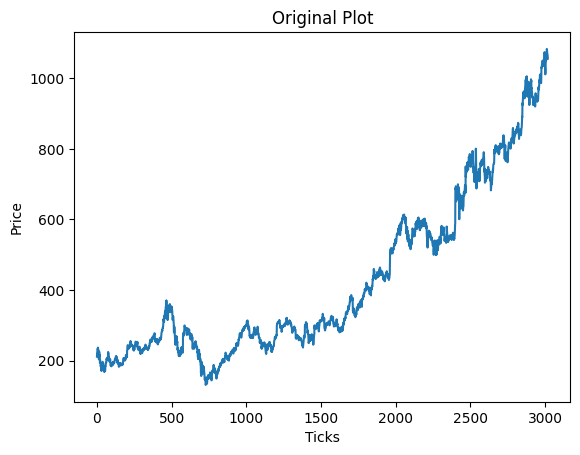

In [6]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'Open', data = g_stk);

In [7]:
g_stk['Rolling_Mean'] = g_stk['Open'].rolling(window = 80).mean()
g_stk.head(5)



C:\Users\HDHARANI\AppData\Local\Temp\ipykernel_2784\4195931674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_stk['Rolling_Mean'] = g_stk['Open'].rolling(window = 80).mean()


,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1,NaN
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2,NaN
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3,NaN
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4,NaN


In [8]:
filt_g = g_stk[(g_stk['Ticks'] >= 900) & (g_stk['Ticks'] <= 1100)]
filt_g.head()



,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2009-07-31,225.21,226.58,221.44,221.75,2861550,GOOGL,900,205.07250
2009-08-03,224.59,227.18,224.04,226.33,2591173,GOOGL,901,205.60575
2009-08-04,224.91,227.23,224.44,227.09,2390098,GOOGL,902,206.10550
2009-08-05,228.23,228.68,224.16,225.80,2342227,GOOGL,903,206.63525
2009-08-06,227.38,227.67,224.49,225.41,2111395,GOOGL,904,207.11925


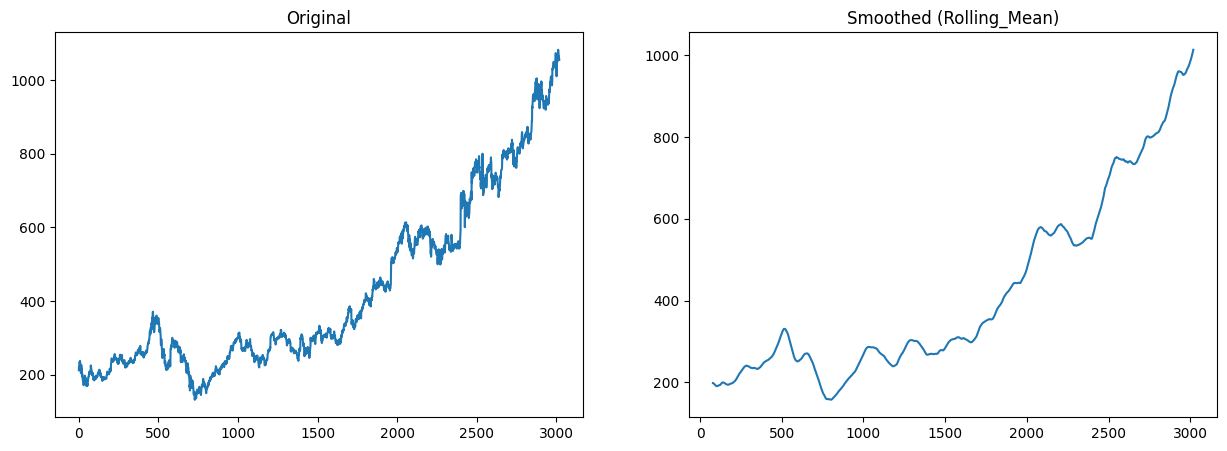

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('Ticks', 'Open', data = g_stk);
axes[0].set_title('Original');

axes[1].plot('Ticks', 'Rolling_Mean', data = g_stk);
axes[1].set_title('Smoothed (Rolling_Mean)');


# Simple Exponential Smoothing - SES 
---forecasts data without trend and seasonal patterns.

---It uses weighted averages(Max weights with recent observation).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6



In [14]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

data = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
##pip install statsmodels==0.9.0rc1



# ## Simple Exponential Smoothing (SES)
##Alpha factor--> 2 cases
* when alpha a=0, it sets smoothed value to the previous smoothed value--- to be precise, it sets to the average value of historical data.
* when alpha a=1, it sets smoothed value to the current smoothed value --- to be precise, it sets the current value to the last/recent observation.

##alpha values should be in between 0 and 1.

In [22]:

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
## forecast for 12 months



C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

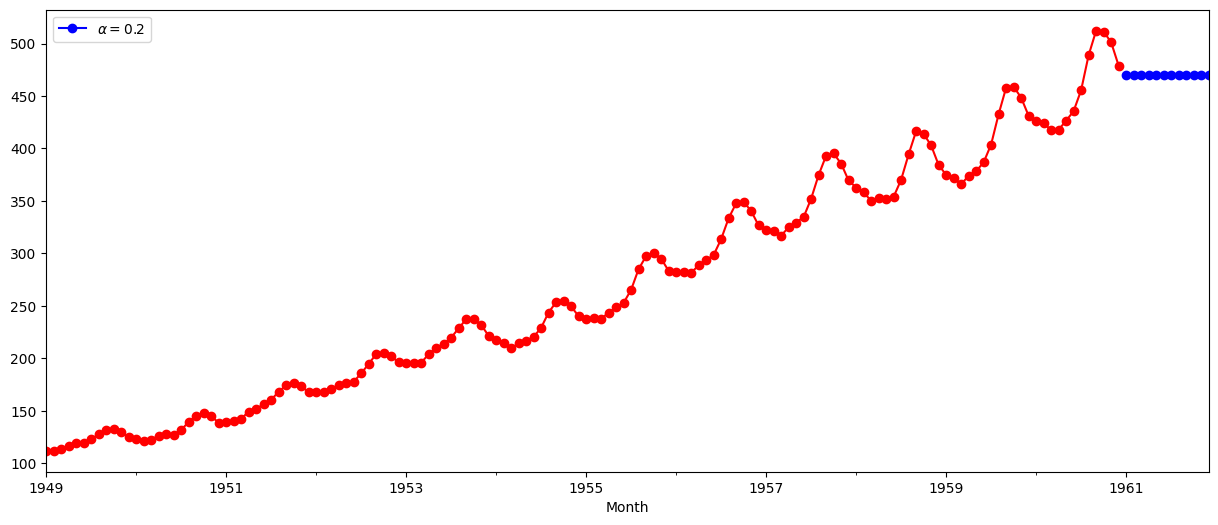

In [23]:
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='red')



# We can specify alpha value manually, and also let statsmodels find an alpha value too.

C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


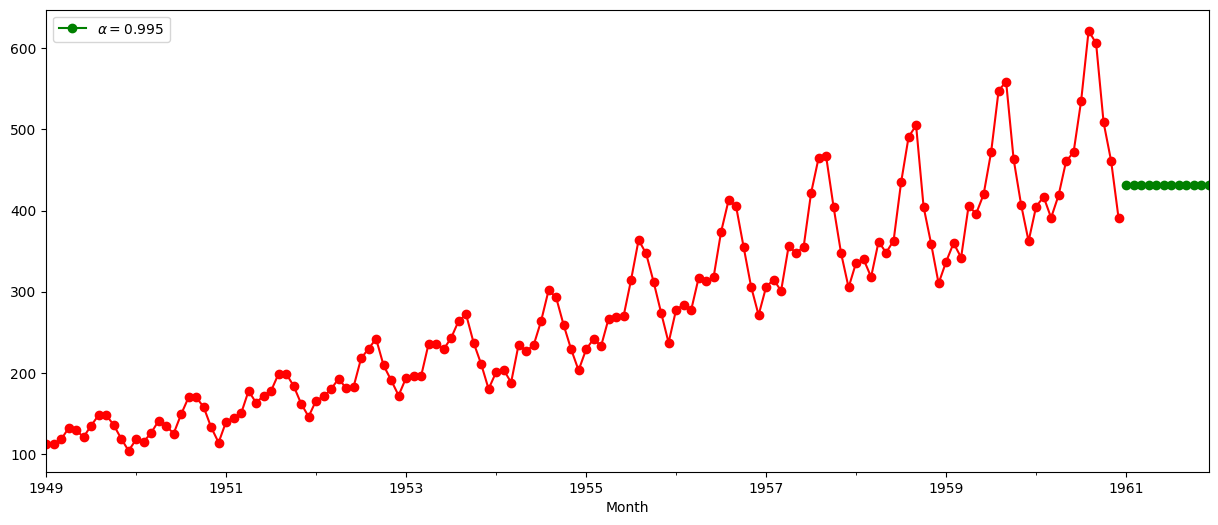

In [36]:
fit3 = SimpleExpSmoothing(data).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='red')

plt.show()

# HOLT - Extended SES
---No trend and no seasoning pattern
---with one more parameter β

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6



In [40]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_format='%Y-%m')



In [41]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
##pip install statsmodels==0.9.0rc1




In [42]:
## provide own values for smoothing parameters α = 0.8 and β = 0.2

fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")#for next 12 months

C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HDHARANI\AppData\Local\Temp\ipykernel_2784\1219767412.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)


<Axes: xlabel='Month'>

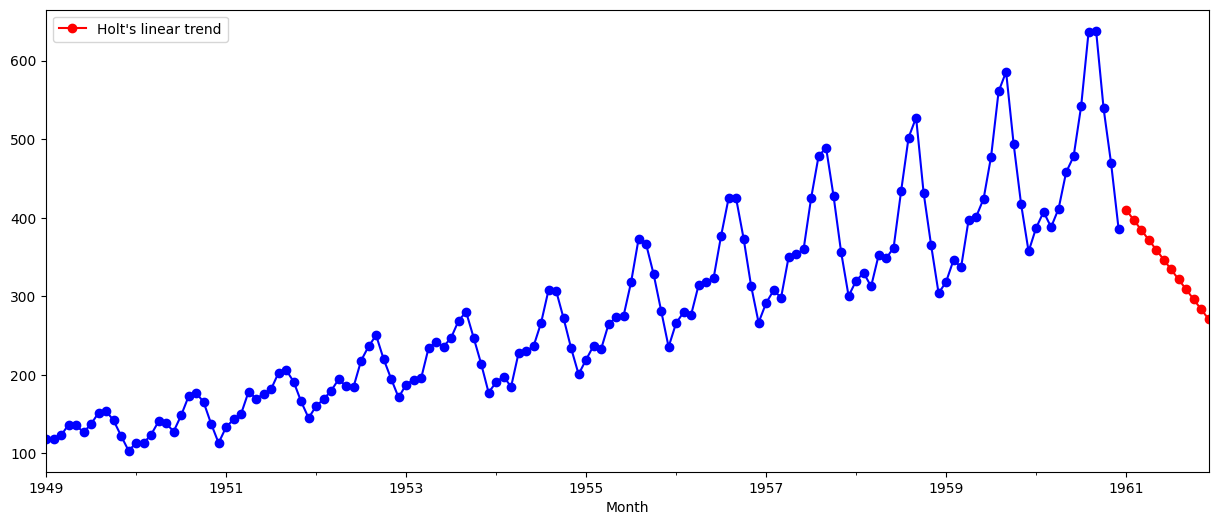

In [43]:
fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='red', marker="o", legend=True)



In [44]:
#####allow for optimisation

fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")



C:\Users\HDHARANI\AppData\Local\Temp\ipykernel_2784\791227045.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HDHARANI\AppData\Local\Temp\ipykernel_2784\791227045.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit3 = Holt(data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)


<Axes: xlabel='Month'>

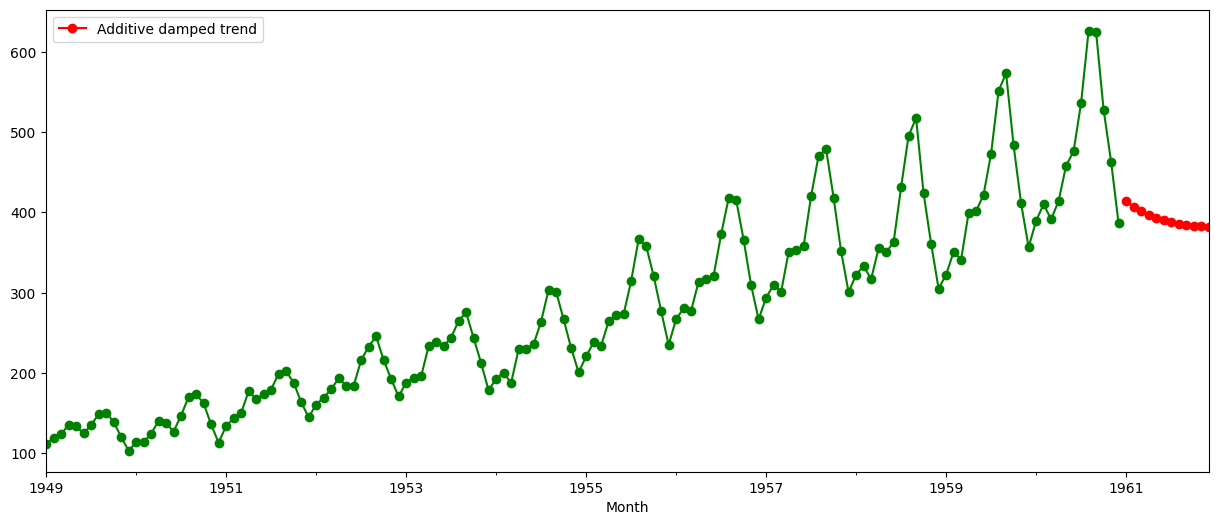

In [45]:
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='red', marker="o", legend=True)

# HOLT Winter  forecasting - uses both trend and seasoning pattern - 36th lecture
---here is a code which use addictive trend and addictive seasoning pattern of period

--- with parameters season_length=6 and Box-Cox transformation.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6



In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)



C:\Users\HDHARANI\AppData\Local\Temp\ipykernel_14552\2691209191.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [9]:
##from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
##pip install statsmodels==0.9.0rc1
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt



In [11]:
##Holt-Winters forecasting (uses both trend & seasonality)¶

fit1 = ExponentialSmoothing(data, seasonal_periods=6, trend='add', seasonal='add')#.fit(use_boxcox=True)



C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
fit1.fittedvalues.plot(style='--', color='red')
fit1.forecast(12).plot(style='--', marker='o', color='black', legend=True)

AttributeError: 'ExponentialSmoothing' object has no attribute 'fittedvalues'

# 37. Auto Regression Model (AR): Consider Previous Time Steps
    --- which uses previous time step as input variable to next (this data is considered as lagged dataset)

In [12]:
from pandas import Series
from matplotlib import pyplot as plt
%matplotlib inline
d = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', header=0)
print(d.head())
d.plot()
pyplot.show()




ImportError: cannot import name 'Image' from 'PIL' (C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\PIL\__init__.py)

In [17]:
values = pd.DataFrame(d.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't-1', 't+1', 't+2'] #----  error in this code.



In [33]:
# split into train 75 and test sets
X = dataframe.values
train_size = int(len(X) * 0.75)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]




# persistence model - predict the output value as a copy of the input value.

In [45]:
 # persistence model
predictions = [x for x in test_X]
type(predictions) 


list

In [47]:
prediction_array = np.asarray(predictions)

In [48]:
type(prediction_array)

numpy.ndarray

In [53]:
type(test_y)

numpy.ndarray

In [61]:
test_y1 = list(test_y)

In [62]:
type(test_y1)

list

In [63]:
## calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]



TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [56]:
from statsmodels.tsa.ar_model import AR



In [57]:
# persistence model on training set
train_pred = [x for x in train_X]


In [58]:
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]



TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [59]:
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))



NameError: name 'train_resid' is not defined

# AR model requires residual error of 12 previous time steps

In [60]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

NameError: name 'train_resid' is not defined

# 38. ARIMA model - autoregressive integrated moving average
--helps in better understanding of data
-- helps in predicting future trends

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6



ImportError: cannot import name 'Image' from 'PIL' (C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\PIL\__init__.py)

In [65]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)




C:\Users\HDHARANI\AppData\Local\Temp\ipykernel_14552\505223508.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [68]:
import statsmodels.api as sm

In [70]:
#from statsmodels.tsa.arima.model.ARIMA import ARIMA

# fit model
#ORDER: p,d,q

model=sm.tsa.arima.ARIMA(data,order=(10, 1, 10))
#model = ARIMA(data, order=(5,1,0))
#sets the lag value to 5 for autoregression, 
#uses a difference order of 1 to make the time series stationary, 
#and uses a moving average model of 0.
model_fit = model.fit()
print(model_fit.summary())



C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmod

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:               ARIMA(10, 1, 10)   Log Likelihood                -579.828
Date:                Sat, 22 Apr 2023   AIC                           1201.657
Time:                        00:02:22   BIC                           1263.876
Sample:                    01-01-1949   HQIC                          1226.940
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1227      0.143      0.860      0.390      -0.157       0.402
ar.L2         -1.0421      0.168     -6.194      0.000      -1.372      -0.712
ar.L3          0.0974      0.266      0.366      0.7

C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


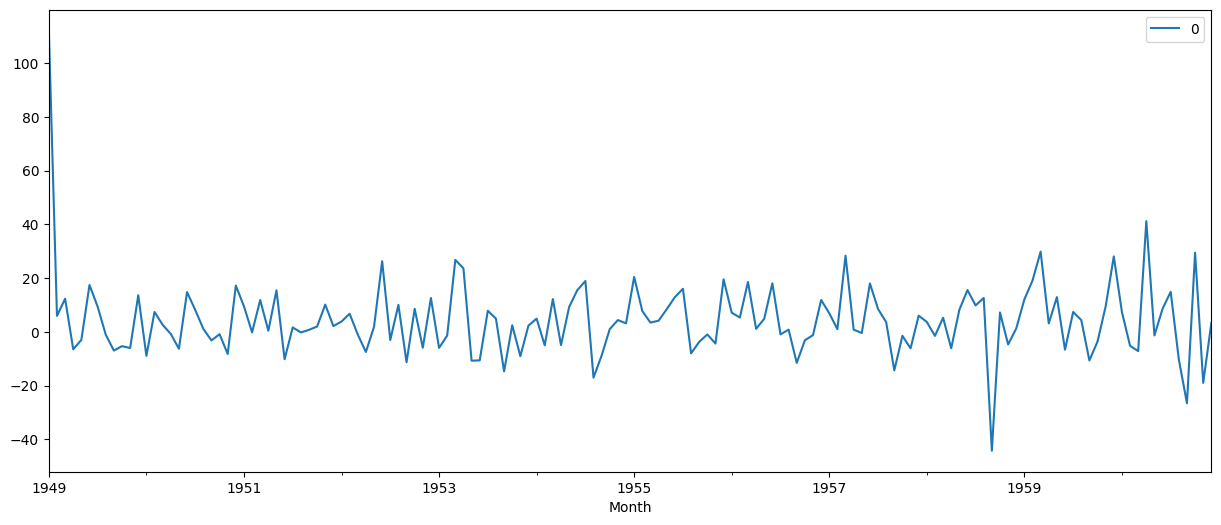

In [71]:
from pandas import DataFrame

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
#here may still be some trend information not captured by the model



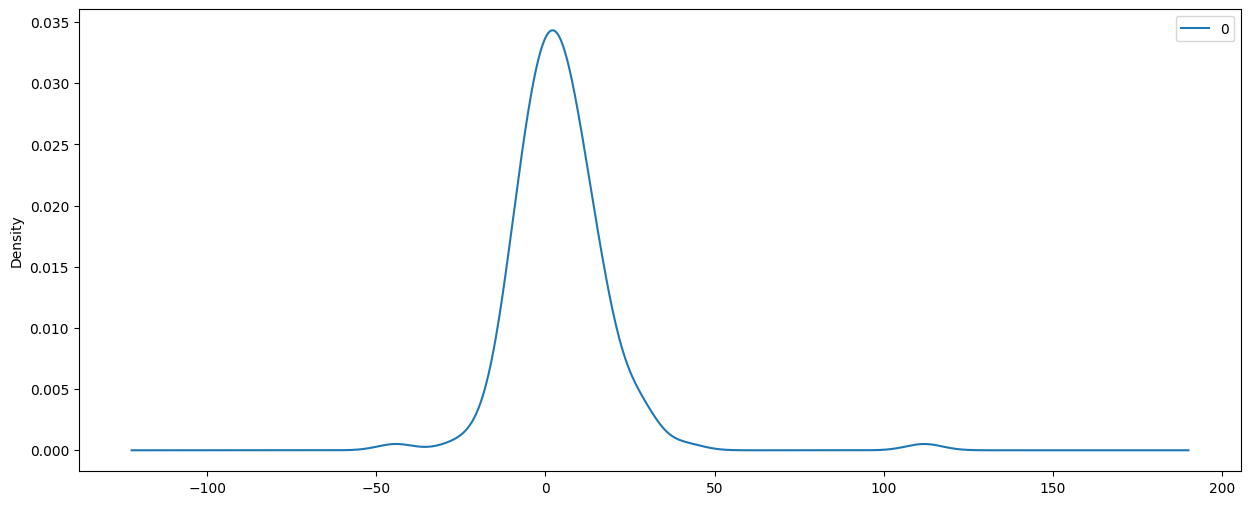

                0
count  144.000000
mean     4.326515
std     14.602218
min    -44.218243
25%     -3.623400
50%      3.139937
75%      9.873524
max    112.000000


In [72]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())



In [75]:
#evaluate -- how good is this model?

X = data.values

size = int(len(X) * 0.75)#75%% training & 25% test
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model=sm.tsa.arima.ARIMA(history, order=(5, 1, 0))
    #model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=378.807394, expected=340.000000
predicted=347.039298, expected=318.000000
predicted=319.545208, expected=362.000000
predicted=370.183743, expected=348.000000
predicted=330.974681, expected=363.000000
predicted=380.116928, expected=435.000000
predicted=433.599677, expected=491.000000
predicted=500.902643, expected=505.000000
predicted=495.672712, expected=404.000000
predicted=343.735375, expected=359.000000
predicted=361.834794, expected=310.000000
predicted=303.424622, expected=337.000000
predicted=390.436615, expected=360.000000
predicted=373.135039, expected=342.000000
predicted=341.144954, expected=406.000000
predicted=416.666588, expected=396.000000
predicted=374.925051, expected=420.000000
predicted=431.550889, expected=472.000000
predicted=459.671457, expected=548.000000
predicted=568.771046, expected=559.000000
predicted=541.696619, expected=463.000000
predicted=415.026125, expected=407.000000
predicted=392.219976, expected=362.000000
predicted=365.550227, expected=405

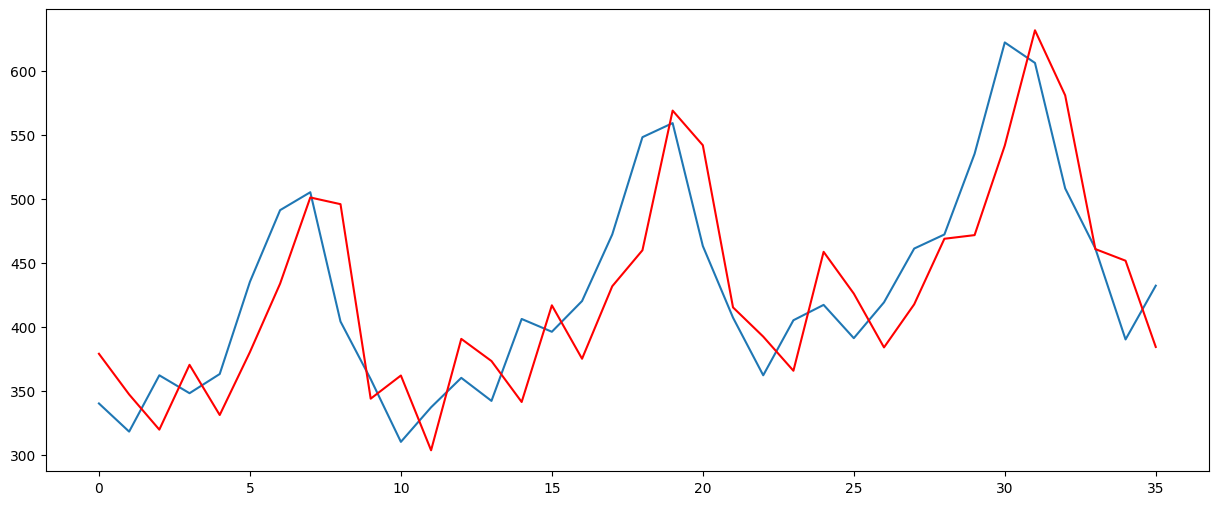

In [76]:
# compare the 25% tested values with predicted values
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# 39. Automated ARIMA and SARIMA (Account for seasonality)

In [77]:


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6



In [78]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)




C:\Users\HDHARANI\AppData\Local\Temp\ipykernel_14552\505223508.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [82]:
from pmdarima import auto_arima
## pip install pyramid-arima



In [83]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=6, max_q=6, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
### Account for seasonality: SARIMA



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.92 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.50 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.70 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.43 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.21 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [84]:
print(stepwise_model.aic())



1019.1780567487607


In [85]:
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

In [86]:
##train the model

stepwise_model.fit(train)



ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [87]:
future_forecast = stepwise_model.predict(n_periods=12)# lets see how these data 
# work from 1960 onward



In [88]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])



--Compare test data with forecasted / pedicted values

<Axes: xlabel='Month'>

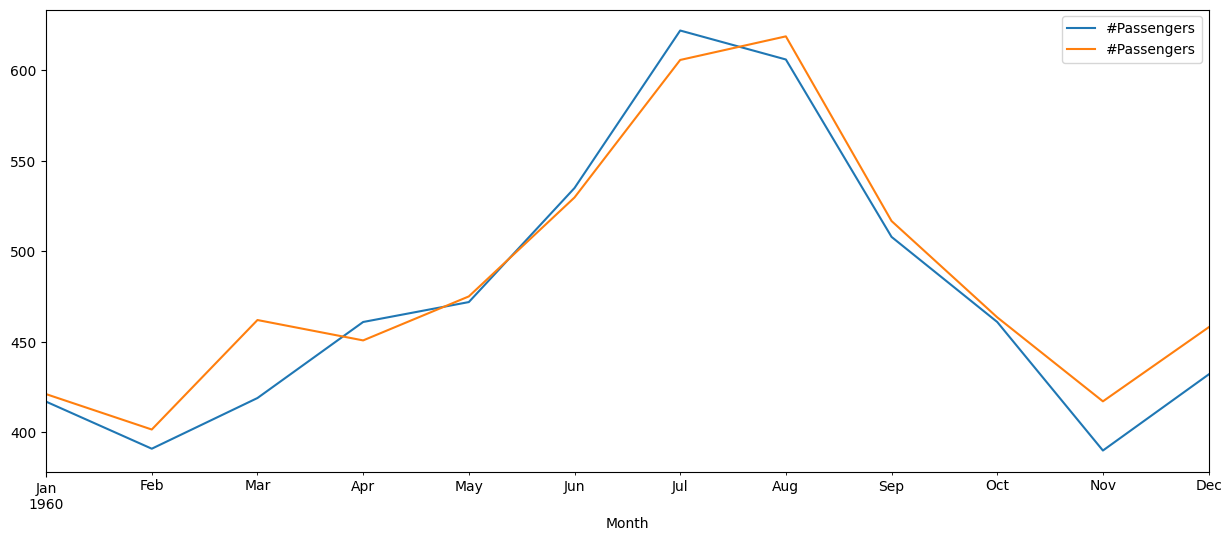

In [89]:
pd.concat([test,future_forecast],axis=1).plot()



<Axes: xlabel='Month'>

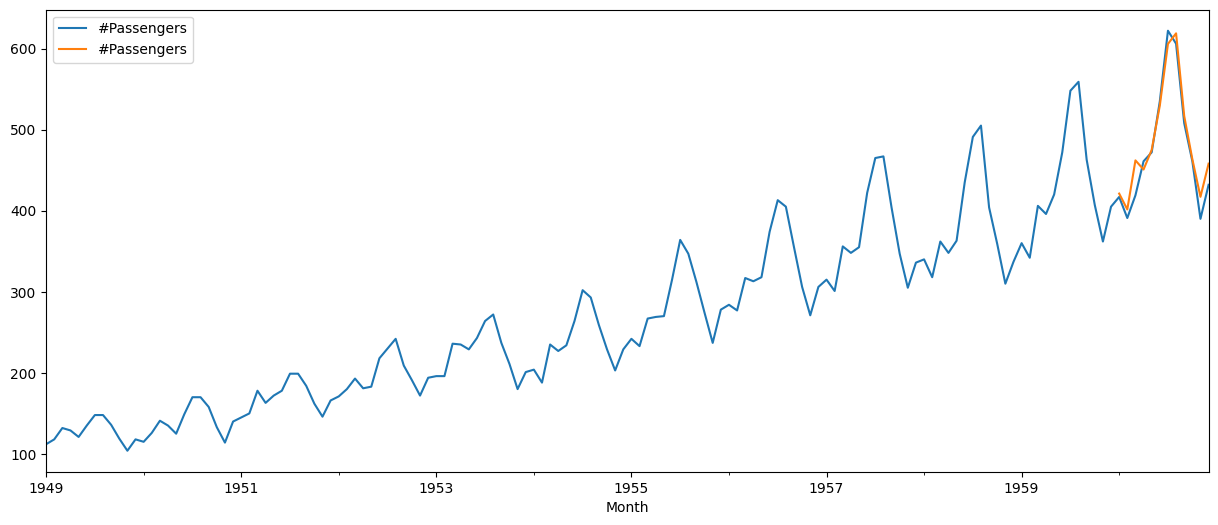

In [90]:
pd.concat([data,future_forecast],axis=1).plot() 

# 40. Random Forest For Identifying Important Time Periods
--- ML can be used here to identify important variables or lags


C:\Users\HDHARANI\AppData\Local\Temp\ipykernel_14552\1143005522.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


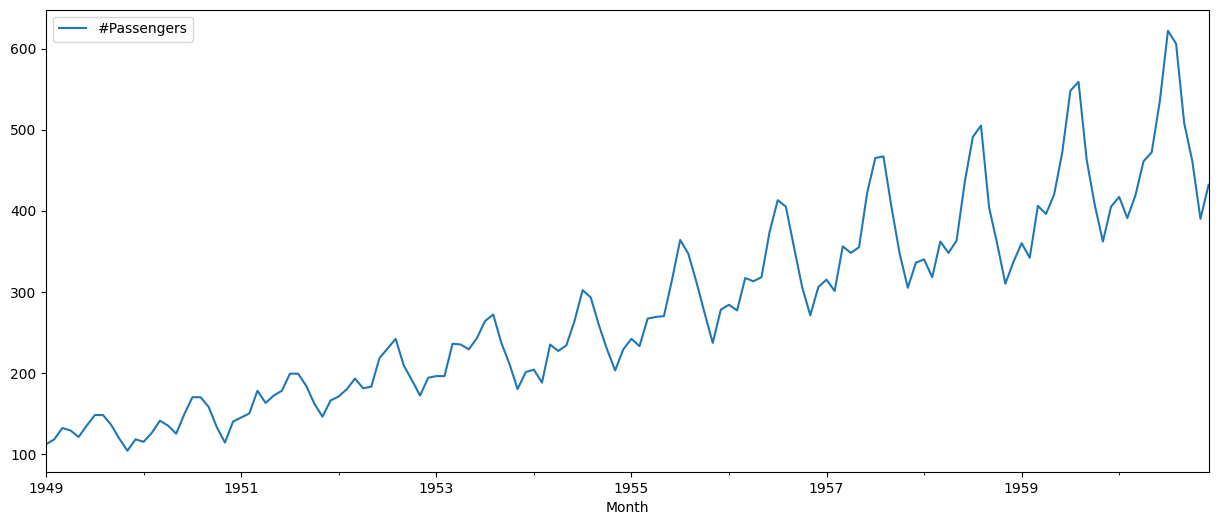

In [96]:

from pandas import Series
from matplotlib import pyplot
#d = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', header=0)
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
d = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

print(d.head())
d.plot()
pyplot.show()




In [97]:
# remove seasonal difference
differenced = d.diff(12)


In [99]:
differenced.head(n=13)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


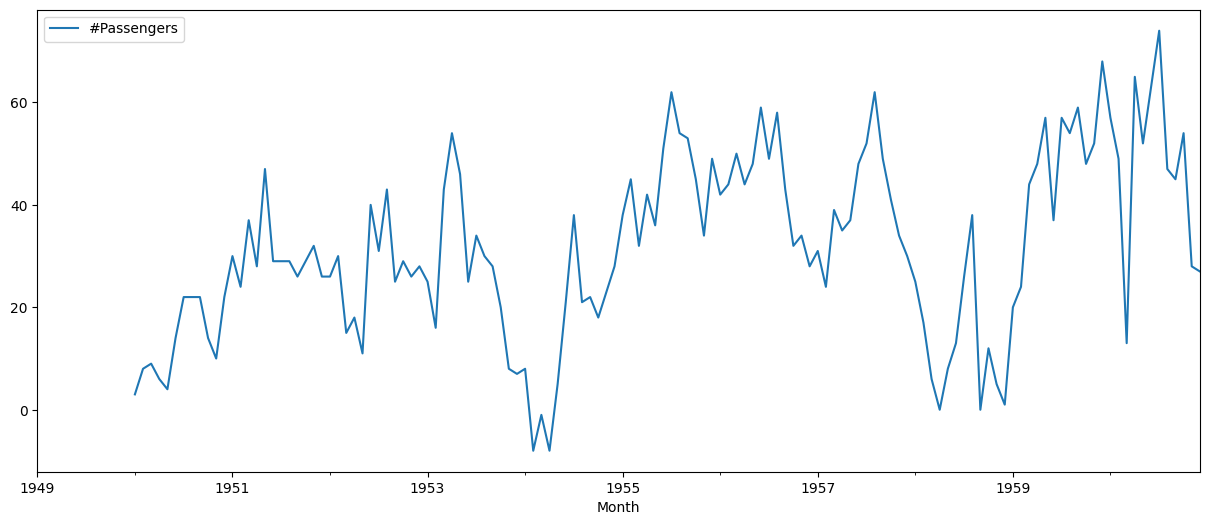

In [102]:
differenced.plot()
pyplot.show()

In [103]:
# trim off the first year of empty data
differenced = differenced[12:]



In [104]:
differenced.head(n=13)

,#Passengers
Month,
1950-01-01,3.0
1950-02-01,8.0
1950-03-01,9.0
1950-04-01,6.0
1950-05-01,4.0
1950-06-01,14.0
1950-07-01,22.0
1950-08-01,22.0
1950-09-01,22.0


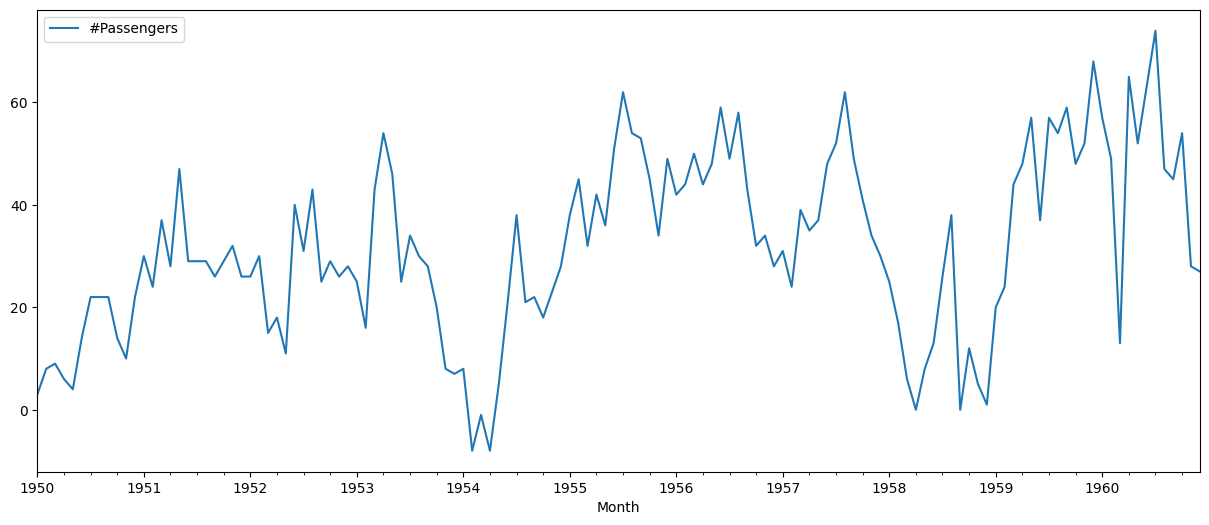

In [105]:
differenced.plot()
pyplot.show()

# Create a new time series with 12 months of lag values to predict the current observation

In [106]:
# reframe as supervised learning
dataframe = pd.DataFrame()
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = differenced.shift(i)
    dataframe['t'] = differenced.values
print(dataframe.head(13))
dataframe = dataframe[13:]



            t-12     t  t-11  t-10  t-9  t-8   t-7   t-6   t-5   t-4   t-3  \
Month                                                                        
1950-01-01   NaN   3.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-02-01   NaN   8.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-03-01   NaN   9.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-04-01   NaN   6.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   3.0   
1950-05-01   NaN   4.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   3.0   8.0   
1950-06-01   NaN  14.0   NaN   NaN  NaN  NaN   NaN   NaN   3.0   8.0   9.0   
1950-07-01   NaN  22.0   NaN   NaN  NaN  NaN   NaN   3.0   8.0   9.0   6.0   
1950-08-01   NaN  22.0   NaN   NaN  NaN  NaN   3.0   8.0   9.0   6.0   4.0   
1950-09-01   NaN  22.0   NaN   NaN  NaN  3.0   8.0   9.0   6.0   4.0  14.0   
1950-10-01   NaN  14.0   NaN   NaN  3.0  8.0   9.0   6.0   4.0  14.0  22.0   
1950-11-01   NaN  10.0   NaN   3.0  8.0  9.0   6.0   4.0  14.0  

In [107]:
from sklearn.ensemble import RandomForestRegressor



In [108]:
array = dataframe.values


In [109]:
# split into input and output
X = array[:,0:-1]
y = array[:,-1]



In [110]:
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)



RandomForestRegressor(n_estimators=500, random_state=1)

In [112]:
#show importance scores
print(model.feature_importances_)
#plot importance scores

[0.0249511  0.37561103 0.01541998 0.0167022  0.01435688 0.02521651
 0.02093459 0.02271564 0.02462942 0.05339896 0.12840096 0.27766272]


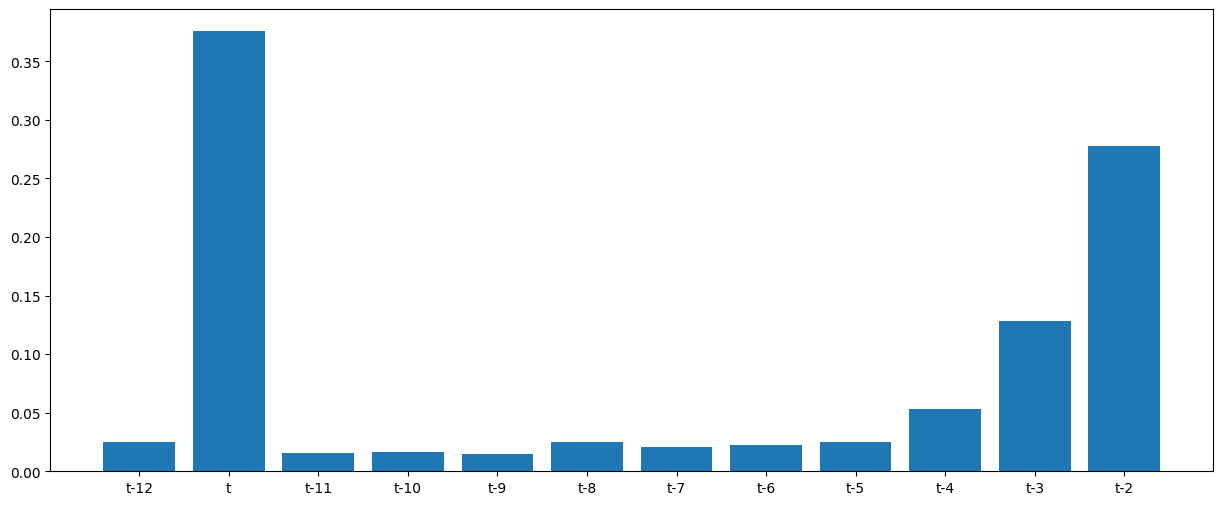

In [113]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()



In [114]:
from sklearn.feature_selection import RFE



In [117]:
# perform feature selection
rfe = RFE(estimator=RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select= 4)
fit = rfe.fit(X, y)



In [118]:
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

t
t-4
t-3
t-2


# 41. "Prophetic" Time Series Forecasting
--addictive model
--where non-linear trends fits to seasonality.

In [120]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
#conda install -c conda-forge fbprophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [121]:
N = 60 # number of days for test split
i = 1800 # one example time series to train



In [122]:
all_data = pd.read_csv(r"C:\Users\HDHARANI\Downloads\train_1.csv").T
key = pd.read_csv(r"C:\Users\HDHARANI\Downloads\key_1.csv")



In [124]:
train, test = all_data.iloc[0:-N,:], all_data.iloc[-N:,:]
#Handle N/A
test_cleaned = test.T.fillna(method='ffill').T
train_cleaned = train.T.iloc[:,1:].fillna(method='ffill').T



In [127]:
#fill outliers that are out of 1.5*std with rolling mean of 50 days
data=train_cleaned.iloc[:,i].to_frame()
data.columns = ['visits']
#data['mean'] = pd.rolling_mean(data.visits,50,min_periods=1)
data['mean'] = data.visits.rolling(50,min_periods=1).mean()
std_mult = 1.5
data.loc[np.abs(data.visits-data.visits.mean())>=(std_mult*data.visits.std()),'visits'] = data.loc[np.abs(data.visits-data.visits.mean())>=(std_mult*data.visits.std()),'mean']
data.index = pd.to_datetime(data.index)



In [128]:
data.head(n=6)

,visits,mean
2015-07-01,1.0,1.000000
2015-07-02,6.0,3.500000
2015-07-03,8.0,5.000000
2015-07-04,7.0,5.500000
2015-07-05,12.0,6.800000
2015-07-06,4.0,6.333333


change labels to make data prophet ready

In [130]:
X = pd.DataFrame(index=range(0,len(data)))
X['ds'] = data.index
X['y'] = data['visits'].values
X.head()



,ds,y
0,2015-07-01,1.0
1,2015-07-02,6.0
2,2015-07-03,8.0
3,2015-07-04,7.0
4,2015-07-05,12.0


In [131]:
X.tail()

,ds,y
485,2016-10-28,12.0
486,2016-10-29,8.0
487,2016-10-30,11.0
488,2016-10-31,13.0
489,2016-11-01,8.0


In [132]:
# forecasting future
m = Prophet(yearly_seasonality=True)
m.fit(X)
future = m.make_future_dataframe(periods=N)
future.tail()



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [133]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,7.785935,4.186690,11.370620
546,2016-12-28,7.642561,3.967386,11.059093
547,2016-12-29,8.066867,4.196916,11.607621
548,2016-12-30,8.136113,4.444765,11.744714
549,2016-12-31,9.448370,6.067926,13.238723


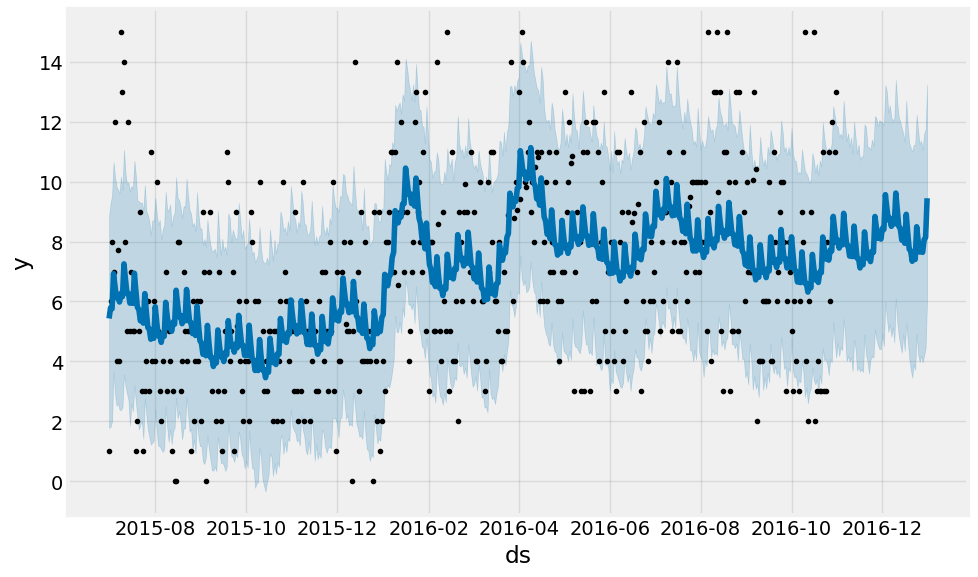

In [134]:
m.plot(forecast);

# 42. Using Prophet For Predicting Values for a Future Time Frame

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
import time
from sklearn.neural_network import MLPClassifier


In [138]:
data = pd.read_csv(r'C:\Users\HDHARANI\Downloads\avocado.csv', parse_dates=['Date'])



In [139]:
summr = data.groupby('Date')['Total Volume'].mean().reset_index()




In [140]:
# Renaming the ts DataFrame's columns 
#ds for Date and y for response variable
renamed_s = summr.rename(columns={"Date": "ds", "Total Volume": "y"})
train_ts = renamed_s.loc[lambda df: df['ds'].dt.year < 2018, :]## before 2018
test_ts = renamed_s.loc[lambda df: df['ds'].dt.year == 2018, :]



In [141]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics



In [142]:

HORIZON = "90days"
PERIOD = "7days"



In [143]:
prophet_model = Prophet()
prophet_model.fit(train_ts)
## evaluate model performance
##pecify the forecast horizon (horizon)
## optionally the size of the initial training period (initial)
prophet_cv_df = cross_validation(prophet_model, horizon=HORIZON, 
                                 period=PERIOD)



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Making 91 forecasts with cutoffs between 2016-01-11 00:00:00 and 2017-10-02 00:00:00


  0%|          | 0/91 [00:00<?, ?it/s]

C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [144]:
prophet_cv_df.head()
##The performance_metrics utility can be used to compute some useful 
##statistics of the prediction performance 
##(yhat, yhat_lower, and yhat_upper compared to y), 
##as a function of the distance from the cutoff 
##(how far into the future the prediction was).




,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-17,9.253107e+05,842790.759321,1.007683e+06,8.628855e+05,2016-01-11
1,2016-01-24,9.678441e+05,885688.538647,1.053676e+06,8.296754e+05,2016-01-11
2,2016-01-31,1.001231e+06,915070.390175,1.080101e+06,8.704668e+05,2016-01-11
3,2016-02-07,1.000284e+06,912223.932096,1.083601e+06,1.300835e+06,2016-01-11
4,2016-02-14,9.581222e+05,875148.333201,1.038098e+06,9.175316e+05,2016-01-11


In [145]:
prophet_perf_df = performance_metrics(prophet_cv_df)



In [146]:
prophet_perf_df.head()



,horizon,mse,rmse,mae,mape,mdape,coverage
0,13 days,1.246744e+10,111657.683299,82645.218722,0.099734,0.082232,0.660924
1,20 days,1.308536e+10,114391.265084,84562.098285,0.103749,0.090537,0.631402
2,27 days,1.354436e+10,116380.235566,86606.322412,0.106940,0.075017,0.609424
3,34 days,1.346108e+10,116021.878522,87725.751704,0.109586,0.071244,0.587446
4,41 days,1.406617e+10,118600.882728,90532.307562,0.113371,0.068684,0.582418


Predict for the future

C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\ProgramData\anaconda3\envs\timeseries\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


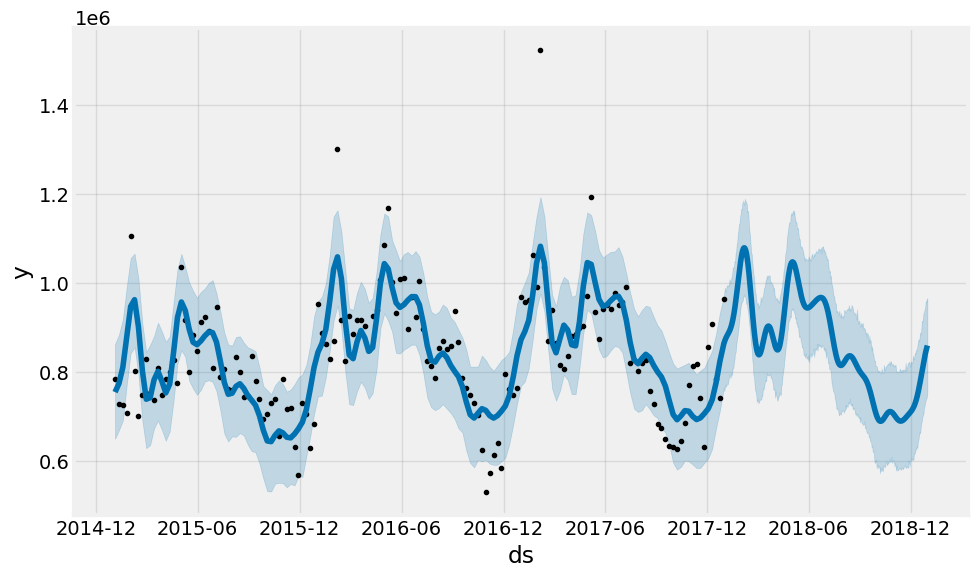

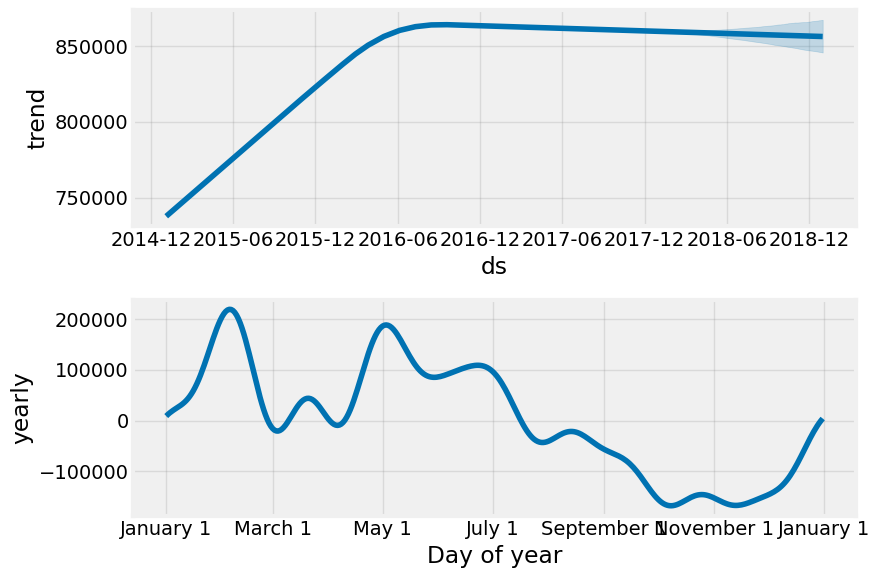

In [147]:
future_prophet_df = prophet_model.make_future_dataframe(periods=365)
## 1 yr
predicted_prophet_df = prophet_model.predict(future_prophet_df)
prophet_model.plot(predicted_prophet_df);
prophet_model.plot_components(predicted_prophet_df);

# 47. MLP For Time Series

In [152]:
import keras

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler



In [155]:
# set seed
np.random.seed(3)
 


In [156]:
# import data set
df = pd.read_csv(r'C:\Users\HDHARANI\Downloads\AirPassengers.csv', sep=',', parse_dates=True, index_col=0)
data = df.values



In [157]:
# using keras often requires the data type float32
data = data.astype('float32')



In [158]:
# slice the data
train = data[0:125, :]   # length 125
test = data[125:, :]     # length 19



In [159]:
def prepare_data(data, lags=1):
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)      
        


In [160]:
# prepare the data
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test     # due to naming convention



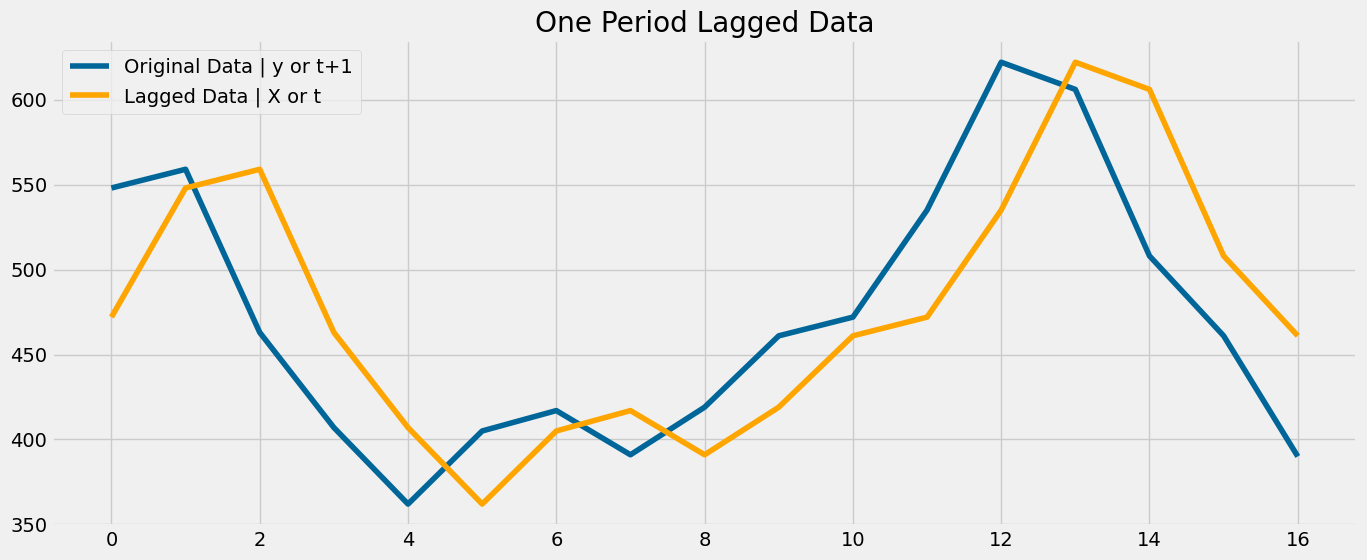

In [161]:
# plot the created data
plt.plot(y_test, label='Original Data | y or t+1', color='#006699')
plt.plot(X_test, label='Lagged Data | X or t', color='orange')
plt.legend(loc='upper left')
plt.title('One Period Lagged Data')
plt.show()



In [162]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(3, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)



Epoch 1/200
62/62 - 2s - loss: 86417.7734 - 2s/epoch - 26ms/step
Epoch 2/200
62/62 - 0s - loss: 73316.0156 - 178ms/epoch - 3ms/step
Epoch 3/200
62/62 - 0s - loss: 60771.3164 - 175ms/epoch - 3ms/step
Epoch 4/200
62/62 - 0s - loss: 49034.2969 - 164ms/epoch - 3ms/step
Epoch 5/200
62/62 - 0s - loss: 38213.9141 - 173ms/epoch - 3ms/step
Epoch 6/200
62/62 - 0s - loss: 28601.9824 - 180ms/epoch - 3ms/step
Epoch 7/200
62/62 - 0s - loss: 20342.8301 - 200ms/epoch - 3ms/step
Epoch 8/200
62/62 - 0s - loss: 13598.7500 - 191ms/epoch - 3ms/step
Epoch 9/200
62/62 - 0s - loss: 8555.6445 - 193ms/epoch - 3ms/step
Epoch 10/200
62/62 - 0s - loss: 5099.6943 - 166ms/epoch - 3ms/step
Epoch 11/200
62/62 - 0s - loss: 2989.6201 - 200ms/epoch - 3ms/step
Epoch 12/200
62/62 - 0s - loss: 1824.6406 - 147ms/epoch - 2ms/step
Epoch 13/200
62/62 - 0s - loss: 1248.2549 - 163ms/epoch - 3ms/step
Epoch 14/200
62/62 - 0s - loss: 999.6921 - 182ms/epoch - 3ms/step
Epoch 15/200
62/62 - 0s - loss: 891.8358 - 163ms/epoch - 3ms/step


In [164]:
import math

In [165]:
# estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))



Train Score: 829.21 MSE (28.80 RMSE)
Test Score: 3144.45 MSE (56.08 RMSE)


In [166]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)
 


1/1 [==============================] - 0s 49ms/step


In [167]:
# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict
 


In [168]:
# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict
 


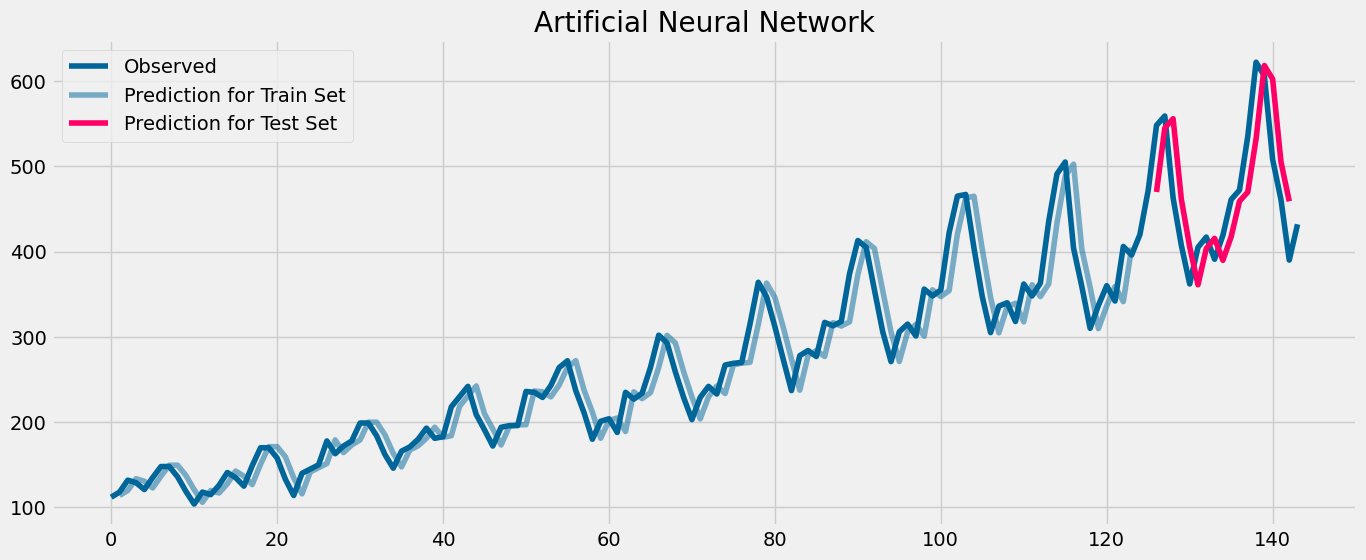

In [169]:
# plot baseline and predictions
plt.plot(data, label='Observed', color='#006699');
plt.plot(train_predict_plot, label='Prediction for Train Set', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Prediction for Test Set', color='#ff0066');
plt.legend(loc='best');
plt.title('Artificial Neural Network')
plt.show()


# 49. LSTM For Predicting Stock Prices

In [170]:
###LSTM on Stock data

##Build a model that predicts the stock prices of a company based on the ##prices of the previous few days

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



In [171]:
df = pd.read_csv(r'C:\Users\HDHARANI\Downloads\Data1\Data1\section 7\all_stocks_5yr.csv')

df.head()



,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [172]:
companies = df.Name.unique()
companies




array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

Closing values of ZTS

In [173]:
z = df.loc[df['Name'] == 'ZTS']
z.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 617781 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [174]:
z.head()



,date,open,high,low,close,volume,Name
617781,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS
617782,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS
617783,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS
617784,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS
617785,2013-02-14,33.39,33.45,32.77,33.27,2954324,ZTS


In [175]:
# creating an array with closing prices
trainingd = z.iloc[:, 4:5].values


Normalizing the values

In [176]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)



##x_train stores the values of closing prices of past 45(or as specified in ##timestamp) days

##y_train stores the values of closing prices of the present day



In [178]:
x_train = []
y_train = []
timestamp = 45
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)



In [179]:
print (x_train[0])
print ('\n')
print (y_train[0])



[0.08995937 0.09402205 0.10330818 0.09963242 0.09421552 0.10795125
 0.10524279 0.08357516 0.08047978 0.08106017 0.07100019 0.07041981
 0.07583672 0.09769781 0.11994583 0.11510931 0.11394854 0.10543625
 0.11917199 0.11007932 0.11182047 0.10485587 0.10833817 0.12071967
 0.09750435 0.08589669 0.08512285 0.09885858 0.09808474 0.0913136
 0.07854517 0.07951248 0.08396208 0.09673051 0.08106017 0.08028632
 0.0798994  0.06655059 0.06887212 0.08744438 0.09750435 0.09189398
 0.09208744 0.09344167 0.07428903]


0.0930547494679822


In [180]:
# Prepare the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



(1214, 45, 1)

In [181]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential() #define the Keras model

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) #120 neurons in the hidden layer
##return_sequences=True makes LSTM layer to return the full history including outputs at all times
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))

model.add(Dense(units = 1)) #output
model.compile(optimizer = 'adam', loss = 'mean_squared_error')








In [182]:
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
38/38 [==============================] - 29s 277ms/step - loss: 0.0141
Epoch 2/25
38/38 [==============================] - 11s 284ms/step - loss: 0.0023
Epoch 3/25
38/38 [==============================] - 10s 268ms/step - loss: 0.0018
Epoch 4/25
38/38 [==============================] - 10s 267ms/step - loss: 0.0022
Epoch 5/25
38/38 [==============================] - 10s 264ms/step - loss: 0.0018
Epoch 6/25
38/38 [==============================] - 10s 260ms/step - loss: 0.0019
Epoch 7/25
38/38 [==============================] - 10s 270ms/step - loss: 0.0015
Epoch 8/25
38/38 [==============================] - 10s 255ms/step - loss: 0.0019
Epoch 9/25
38/38 [==============================] - 10s 273ms/step - loss: 0.0014
Epoch 10/25
38/38 [==============================] - 10s 270ms/step - loss: 0.0015
Epoch 11/25
38/38 [==============================] - 11s 281ms/step - loss: 0.0024
Epoch 12/25
38/38 [==============================] - 10s 274ms/step - loss: 0.0023
Epoch 13/25
3

Try Forecasting on other companies , code is available in the 49th lecture.

# 50. Univariate LSTM For Stock Prediction

In [185]:
!pip install pandas_datareader

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     --------------------- ----------------- 61.4/109.5 kB 1.1 MB/s eta 0:00:01
     ----------------------------------- -- 102.4/109.5 kB 1.5 MB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 902.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
     -- ------------------------------------- 0.2/3.9 MB 4.4 MB/s eta 0:00:01
     ---- ----------------------------------- 0.4/3.9 MB 4.4 MB/s eta 0:00:01
     ------ --------------------------------- 0.6/3.9 MB 4.3 MB/s eta 0:00:01
     -------- ------------------------------- 0.8/3.9 MB 4.3 MB/s eta 0:00:01
     ---------- ----------------------------- 1.0/3.9 MB 4.3 MB/s eta 0:00:01
     ------------ --------------------------- 1.3/3.9 MB 4.4 MB/s eta 0:00:01
     --------------- ------------------------ 1.5/3.9 MB 4.8 MB/s eta 0:00:01
     ------------------- -------------------- 1.9/3.9 MB 5.0 MB/s eta 

In [186]:
import math
import pandas_datareader as web ##read in financial data
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [187]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam

In [194]:
df = web.DataReader('GE', data_source='yahoo', 
                    start='2012-01-01', end='2019-12-31') 

SyntaxError: positional argument follows keyword argument (3932735954.py, line 1)

In [ ]:
df.head(n=8)

In [ ]:
#Create a new dataframe with only the 'Open' column
data = df.filter(['Open']) ##we store our open column
#Converting the dataframe to a numpy array
dataset = data.values


In [ ]:
#dataset.shape

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)#values from 0 to 1

In [ ]:
train= scaled_data[:int(df.shape[0]*0.8)] #80% train
valid = scaled_data[int(df.shape[0]*0.8):]

In [ ]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
def create_dataset(d, look_back=1):
    dataX, dataY = [], []
    for i in range(len(d)-look_back-1):
        a = d[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(d[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

ADAM = Adam(0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='mse', optimizer='ADAM')


In [ ]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

In [ ]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

In [ ]:
from numpy import newaxis

In [ ]:
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

unseen values

In [ ]:
predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)